# Jupyter Notebook Introduction

_Note: Once you have opened a Jupyter session in the terminal and opened a notebook from the file directory that opened in the browser window, you must keep both the terminal and original browser window open. Closing either will close your notebook, potentially without the most recent changes._

The first cell is a good place to put any packages or local scripts that you are importing into the notebook. Because some of the packages have long names (or functions within the packages get lengthy), it is usefuly to abbreviate the package name when importing. 

Ex: `import numpy as np` allows you to call functions with np.functionName 

Depending on the size of the package, importing can take some time. When you are running locally this is not an issue but I have noticed when using cloud based sevices this can add run time to the notebook. If you know specific function or subset of functions within a package, you can choose to just import those functions.

Ex: `from numpy import optimization`

For basic notebooks, numpy and matplotlib tend to be enough to work with. Later, we will have to import the quantum computing packages which do not come standard to the Anaconda Python distributions. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Trapezoidal Rule
This program illustrates integration of the exponential function using the trapezoidal rule. This version uses error traps.

Modified to Python 7/10/2019 from Fortran by CWJ SDSU 2/3/2005

In [2]:
print ('Demonstration of trapezoidal rule')
print ('on function exp(x) on interval (a,b)')
print ('')

# Enter parameters
# The input functinos assumes a string, you can force the type
# by wrapping the input function in the desired variable type. 
a = float(input('Enter start of interval,a: '))
b = float(input('Enter end of interval, b: '))

# Check order
# This simply swaps the values of a and b 
if (a > b):
    a, b = b, a

# Read in number of points
# You can choose to read N as an integer like the original.
N = int(input('Enter # of points to be used: '))

# Test that int vs float does not matter mathematically in Python
# print('Testing type casting: ', (b-a)/N)

# And then cast type to be float for the compuation. Python will 
# treat the integer as a float in the division operation so the 
# type cast is not necessary (see commented print statement above)
dx = (b-a)/float(N)
print ('dx = ', dx)

# Create an array of length N with zeros
f = np.zeros(N)

# Fill out array
for i in range(N):
    x = a + (i+1)*dx
    f[i] = np.exp(x)

# Initialize integral
# "sum" is a forbidden word in Python
trapSum = 0.0

# Apply trapezoidal rule
for i in range(1,N):
    trapSum = trapSum + 0.5*dx*(f[i]+f[i-1])

# Print results
exactSum = np.exp(b) - np.exp(a)
perError = 100*np.abs(exactSum-trapSum)/exactSum

print ('Exact = ', exactSum, ' Approx = ', trapSum)

Demonstration of trapezoidal rule
on function exp(x) on interval (a,b)

Enter start of interval,a: 1
Enter end of interval, b: 2
Enter # of points to be used: 10
dx =  0.1
Exact =  4.670774270471606  Approx =  4.3885435411791605


### Comparison of trapezoidal and Simpson's rules.
Using cells to store individual functions is one of the more useful tools in Jupyter notebook. When you pseudo-compile a cell containg a function, you will most likely see no output, you will just be moved to the next cell. This is because a function is not evaluated until it is called. Python will not warn you of errors in a function until you call that function. 

Like a Fortran subroutine, a Python function can be called with or without arguments. Passing in/out variables is not necessary, you typically only need to pass the function the variables it needs for computation. The `return` command will pass back the desired variable and it is assigned in the main routine through a `=` sign. 

In [3]:
# Function
# Trapezoidal rule, takes an array and a step size as input, 
# returns the sum multiplied by dx
def trapezoidal(array,h):
    ans = 0.0
    N = len(array)
    ans = 0.5*(array[0] + array[N-1])
    
    for i in range(1,N-1):
        ans = ans + array[i]

    return ans*h

In [4]:
# Function
# Simpson's rule, takes an array and a step size as input,
# returns the sum multiplied by dx/3
def simpson(array,h):
    N = len(array)
    ans = 0.0
    
    # Error trap, check that N is even 
    if np.mod(N,2)!=0:
        print ('Dimension of array is not even ', N)
        return
    
    for i in range(1,N-1,2):
        ans = ans + array[i-1] + 4*array[i] + array[i+1]
    
    return ans*h/3

### Calling a function
If you are using a function to return a single variable, the call is straight forward. The function will return whatever variable is assigned in its `return` statement to the variable in main left the `=` sign. 

If you have more than 1 variable you wish to return, you need to modify the `return` statement in the function. You can return a list of variables in the following way:
<br>`return (variableA, variableB, variableC)` 

The number of variables returned from the subroutine must match the number of variables in main you are assigning. If we are returning the three variables listed above, the assignment in main wuold look like:
<br>`variableA, variableB, variableC = function(x,y)`

In [5]:
trapAns = trapezoidal(f,dx)
simpAns = simpson(f,dx)

print ('Comparison of Trapezoidal vs. Simpsons Rule')
print ('Trapezoidal: ', np.abs(trapAns - exactSum))
print ('Simpsons:    ', np.abs(simpAns - exactSum))

Comparison of Trapezoidal vs. Simpsons Rule
Trapezoidal:  0.2822307292924453
Simpsons:     0.9890438091665441


## Differentiation Examples
From Phys 580 website.

In [6]:
# A first program to compre numerical differentiation
# From program diff_sine1 by CWJ August 2006
x  = float(input('Enter x:  '))
dx = float(input('Enter dx: '))

f = np.sin(x)
dfdx = (np.sin(x+dx)-np.sin(x))/dx
print ('F: %f \t dFdx: %f \t Cos(x): %f ' % (f,dfdx,np.cos(x)))

dfdx = (np.sin(x+dx)-np.sin(x-dx))/(2*dx)
print ('F: %f \t dFdx: %f \t Cos(x): %f ' % (f,dfdx,np.cos(x)))

Enter x:  0.5
Enter dx: 0.001
F: 0.479426 	 dFdx: 0.877343 	 Cos(x): 0.877583 
F: 0.479426 	 dFdx: 0.877582 	 Cos(x): 0.877583 


In [7]:
# A 2nd program to compare numerical differentiation
# From program diff_sine2 by CWJ August 2006
dx = float(input('Enter dx: '))

while dx <= 0:
    print ('dx cannot be zero')
    dx = float(input('Enter dx: '))

file1 = open('approxFile_sine2.txt','w')
file2 = open('exactFile_sine2.txt','w')
    
for i in range(1,20):
    x = i*0.1
    dfdx = (np.sin(x+dx)-np.sin(x))/dx
    if i ==1:
        print ('')
        print ('dFdx \t \t Cos(x)')
    print ('%f \t %f' % (dfdx,np.cos(x)))
    file1.write('%f \t %f \n' % (x,dfdx))
    file2.write('%f \t %f \n' % (x,np.cos(x)))

file1.close()
file2.close()

print ('')
print ('Approxmation written: to approxFile_sine2.txt')
print ('Exact written:        to exactFile_sine2.txt')

Enter dx: 0.001

dFdx 	 	 Cos(x)
0.994954 	 0.995004
0.979967 	 0.980067
0.955189 	 0.955336
0.920866 	 0.921061
0.877343 	 0.877583
0.825053 	 0.825336
0.764520 	 0.764842
0.696348 	 0.696707
0.621218 	 0.621610
0.539881 	 0.540302
0.453150 	 0.453596
0.361892 	 0.362358
0.267017 	 0.267499
0.169474 	 0.169967
0.070238 	 0.070737
-0.029699 	 -0.029200
-0.129340 	 -0.128844
-0.227689 	 -0.227202
-0.323763 	 -0.323290

Approxmation written: to approxFile_sine2.txt
Exact written:        to exactFile_sine2.txt


__A Note on Python File Output__: The Python write statement does not default to a new line in the file like Fortran does. You have to manually add a new line character to the end of the print statement for it to write the same way as the output appears above in the notebook. 

You can also have multiple files open to print to. The biggest issue with I/O is forgetting to close a file, it can easily crash a program or corrupt the output. 

In [8]:
# A 3rd program to compare numerical differentiation
# Compare asymmetric 2-point formule against 
# symmetric 3-point formula. 
# From program diff_sine3 by CWJ August 2006
dx = float(input('Enter dx: '))

while dx <= 0:
    print ('dx cannot be zero')
    dx = float(input('Enter dx: '))

fileName1 = 'exactFile_sine3.txt'
fileName2 = 'twoPoint_sine3.txt'
fileName3 = 'threePoint_sine3.txt'
    
file1 = open(fileName1, 'w')
file2 = open(fileName2, 'w')
file3 = open(fileName3, 'w')

for i in range(1,20):
    x = i*0.1
    # 2-point formula
    dfdx = (np.sin(x+dx)-np.sin(x))/dx
    file2.write('%f \t %f \n' % (x,dfdx))
    dfdx = (np.sin(x+dx)-np.sin(x-dx))/(2*dx)
    file3.write('%f \t %f \n' % (x,dfdx))
    file1.write('%f \t %f \n' % (x,np.cos(x)))

file1.close()
file2.close()
file3.close()

print ('')
print ('Exact written to %s:       ' % fileName1)
print ('Two point written to %s:   ' % fileName2)
print ('Three point written to %s: ' % fileName3)

Enter dx: 0.001

Exact written to exactFile_sine3.txt:       
Two point written to twoPoint_sine3.txt:   
Three point written to threePoint_sine3.txt: 


I have replaced the explicit file name in the open file and print name statements. I have not tried to use unit numbers in Python like they are used for organization in Fortran, instead I will give files a distinct name with a string variable and reference that when opening the file and if I wish to print the file name to console at a later point in the program. 

## Basic Math with Numpy
Unlike Fortran, Python does not have a math library built into the base code. You need to import a package that contains the math routines you need. This is usually `numpy` or `scipy`, which package you choose depends on the routines you need, but in the past I have used `numpy` roughly 95% percent of the time.

Once you have imported numpy with: `import numpy as np`, you can call routines within that package. The most useful resource for the math routines and descriptions is: <a href="https://docs.scipy.org/doc/numpy-1.13.0/index.html">Numpy Overview</a>
(_I realize I just told you I primarily use Numpy, why the most useful documentation source is on a Scipy site is beyond me._)

Searching a given math routine, the documentation site will give you detailed input and output information, data types accepted, different variations of use, examples of use and sometimes related routines. One of the larger hurdles I had when getting started was not checking the docs and assuming I understood how the inputs and outputs should function. Because Python errors are about as useful as a gfotran error, the best trouble shotting comes from reading the docs.

### Counterparts to Fortran Intrinsic Functions

In [9]:
# Powers
print ('Powers')
x = 2**4
print('2^4 = ', x)
x = 2**1.5
print('2^3/2 =', x)

# Trig functions
# Like Fortran, the default argument is in radians. 
x = 0.5
a = np.sin(x)
b = np.cos(x)
c = np.tan(x)
d = np.arcsin(x)
e = np.arccos(x)
f = np.arctan(x)

print('')
print('Trig Functions')
print('Sin(x): %f, \t Cos(x): %f, \t Tan(x): %f ' % (a,b,c))
print('ASin(x): %f, \t ACos(x): %f, \t ATan(x): %f ' % (d,e,f))

Powers
2^4 =  16
2^3/2 = 2.8284271247461903

Trig Functions
Sin(x): 0.479426, 	 Cos(x): 0.877583, 	 Tan(x): 0.546302 
ASin(x): 0.523599, 	 ACos(x): 1.047198, 	 ATan(x): 0.463648 


In the cell above, I have used three new things in my print statement. 
- I have included place holders for the values I want to print to screen.
- I have given the print statement a list of values to print. 
- I have included a tab character to make the output neater.

Most of the print functionality is the same in Python. Tab is still a `\t` character, a floating point number place holder is a `%f` and so on. If you want to include multiple place holders in a `print` statement, you must also include a list of values. The number of place holders and values must be the same. The values are passed as a list at the end of the statement, `% (a,b,c)` and are placed in the order they appear.

In [10]:
# Log Functions
# Again, like Fortran, the base is e
x = 5
a = np.log(x)
b = np.log10(x)
c = np.exp(5)

print('Logs and Exponents')
print('Log(x): %f \t Log10(x): %f \t Exp(x): %f ' % (a,b,c))

Logs and Exponents
Log(x): 1.609438 	 Log10(x): 0.698970 	 Exp(x): 148.413159 


In [11]:
# Other
x = 32
a = np.sqrt(x)
b = np.abs(-x)
c = float(x)
d = int(c)

print ('Other math functions')
print ('Sqrt(x): %f \t Abs(-x): %f \t  \nFloat(x): %f \t Int(c): %f' % (a,b,c,d))

Other math functions
Sqrt(x): 5.656854 	 Abs(-x): 32.000000 	  
Float(x): 32.000000 	 Int(c): 32.000000


### Logical Operators
Python logical operators and their Fortran equivalent. 

In [12]:
x = 2
y = 2
z = 3

print('Basic Evaluations')
print('x .LT. z ?', x<z)
print('x .LT. y ?', x<y)
print('x .EQ. y ?', x==y)
print('x .LE. y ?', x<=y)

print('')
print('.AND. .OR. .NOT. Evaluations')
print('x .EQ. y .AND. x<z        ?', (x==y and x<z))
print('x .NOT. z .AND. y .NOT. z ?', (x!=z and y!=z))
print('x .GT. y .OR. x .LT. z    ?', (x>y or x<z))

Basic Evaluations
x .LT. z ? True
x .LT. y ? False
x .EQ. y ? True
x .LE. y ? True

.AND. .OR. .NOT. Evaluations
x .EQ. y .AND. x<z        ? True
x .NOT. z .AND. y .NOT. z ? True
x .GT. y .OR. x .LT. z    ? True


## Eigensolver
Using a built-in eigensolver for a 1-d particle in a box from the scattering primer.

In [29]:
L = float(input('Enter length of box, L: '))
N = int(input('Enter number of lattice points, N: '))
dx = L/(N+1)

h = np.zeros((N,N))

hbar = 938/2
mass = 197.3
cnst = (-1*hbar*hbar)/(2*mass*dx*dx)
diag = -2*cnst

for i in range(N):
    h[i,i] = diag
    if i < N-1:
        h[i+1,i] = cnst
        h[i,i+1] = cnst
    if i > 1:
        h[i-1,i] = cnst
        h[i,i-1] = cnst
        
h[0,0] = diag
h[0,1] = cnst
h[N-1,N-1] = diag
h[N-1,N-2] = cnst

if N < 11:
    print ('')
    print (h)

eigVal,eigVec = np.linalg.eigh(h)

if N < 11:
    print ('')
    print ('Eigenvalues:')
    for i in range(N):
        print ('%i: %f' %(i,eigVal[i]))

Enter length of box, L: 1
Enter number of lattice points, N: 200


### Basic Plot in MatPlotLib
The basic plot function in MatPlotLib is simply: `plot`. In the simplest use, you just need to provide an array of data to plot, it will default to an x-axis with the index of the data points. 

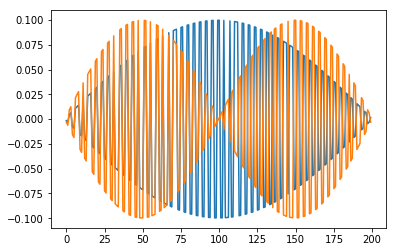

In [30]:
plt.plot(eigVec[0,:])
plt.plot(eigVec[1,:])

### More Plotting
The default size for plotting inline is small (as you can see above). You can change the size of the figure displayed on the screen and later when printing to file to get the appropriate dimensions. When you adjust the size of the image, you also need to scale the text because Python does not do that automatically for the axes, title, data set labels, etc. 

I use `rcParams` to modifying the output of plots. Beyond `'figure.figsize'` and `'font.size'` I do not have many of the options memorized, but it is easy to find them online. Once you modify the `rcParams`, if you rerun __any__ plotting cells in the notebook, those parameters will apply. If I have a notebook that contains plots that I want to apply different parameters to, I will include those individual parameters in the cell containing the plot commands.

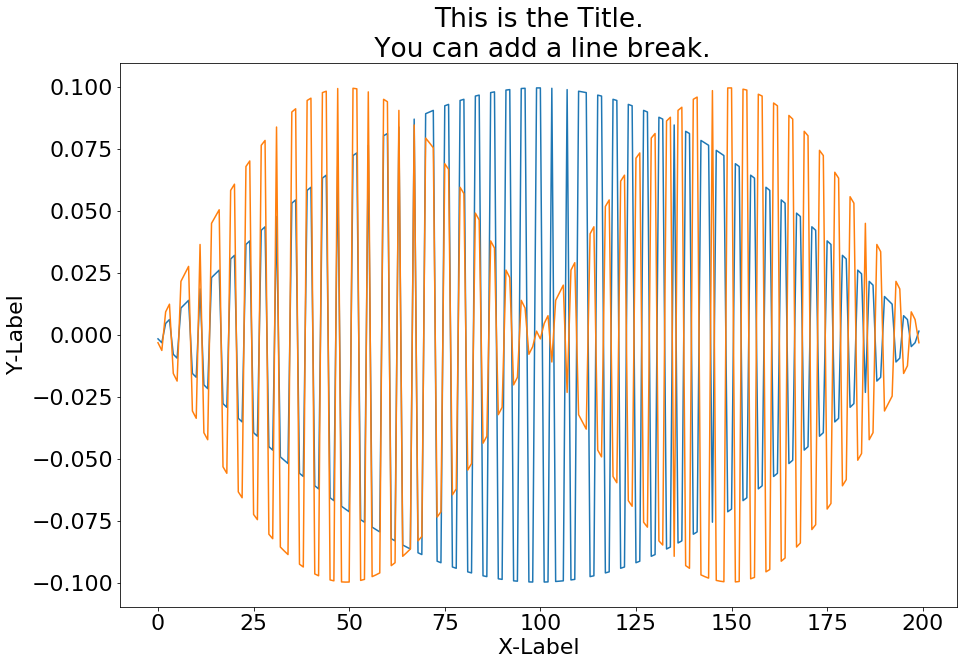

In [46]:
plt.rcParams['figure.figsize']=(15,10)
plt.rcParams['font.size']=22

plt.plot(eigVec[0,:])
plt.plot(eigVec[1,:])

plt.title('This is the Title.\n You can add a line break.')
plt.xlabel('X-Label')
plt.ylabel('Y-Label')

plt.show() # Removes text output that proceeds the plot

It is very easy to label data, but a bit fiddly when modifying the axes labels at first. This is something I still struggle with from time to time. 

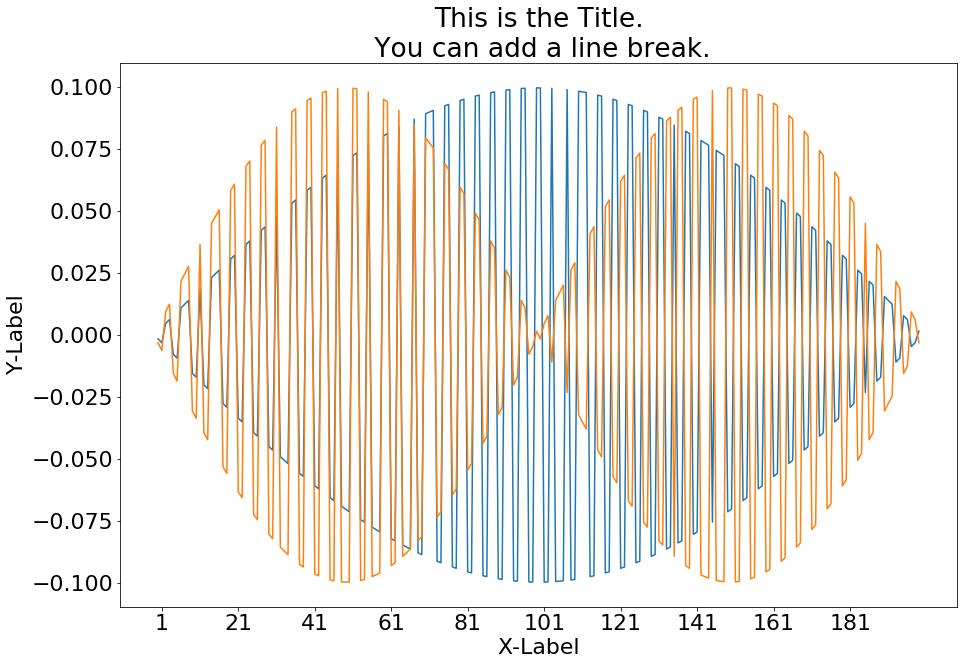

In [52]:
plt.rcParams['figure.figsize']=(15,10)
plt.rcParams['font.size']=22

plt.plot(eigVec[0,:])
plt.plot(eigVec[1,:])

plt.title('This is the Title.\n You can add a line break.')
plt.xlabel('X-Label')
plt.ylabel('Y-Label')

plt.show() # Removes text output that proceeds the plot